In [35]:
#loading imp libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [36]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


In [37]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

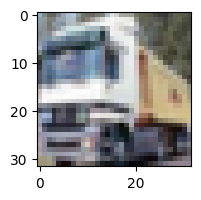

In [38]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [39]:
y_train[:15]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9]], dtype=uint8)

In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [41]:
y_train = y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [42]:
classes[4]

'deer'

In [74]:
def sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  y = y.astype(int)
  plt.xlabel(classes[y[index]])


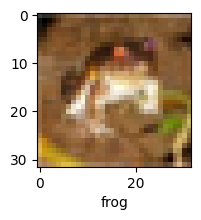

In [44]:
sample(x_train,y_train,0)

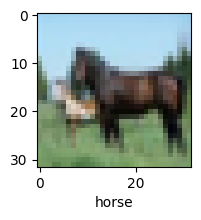

In [45]:
sample(x_train,y_train,12)

In [46]:
#normalizing the pixel values
x_train = x_train/255
x_test = x_test/255

In [47]:
#implementing one ann and testing the performance
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)


Epoch 1/5
 148/1563 [=>............................] - ETA: 2:03 - loss: 2.0959 - accuracy: 0.2302

KeyboardInterrupt: ignored

In [ ]:
ann.evaluate(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [48]:
#implementing one cnn and testing the performance
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    #pooling layers
    layers.MaxPooling2D((2,2)),

     #cnn
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    #pooling layers
    layers.MaxPooling2D((2,2)),

    #fully connected layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 35ms/step - loss: 1.4686 - accuracy: 0.4727
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1554 - accuracy: 0.5957
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0367 - accuracy: 0.6375
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9654 - accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9028 - accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8565 - accuracy: 0.7002
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8162 - accuracy: 0.7166
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7787 - accuracy: 0.7272
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7436 - accuracy: 0.7406
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [49]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9285 - accuracy: 0.6873


[0.9285065531730652, 0.6873000264167786]

In [50]:
#reshaping the testing data
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [52]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [63]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 5s 14ms/step


In [64]:
y_pred[:5]

array([[2.5587138e-03, 1.1843033e-03, 4.7061164e-03, 7.2403926e-01,
        4.7508223e-04, 1.6856316e-02, 4.1810349e-03, 8.1745529e-06,
        2.4589786e-01, 9.3127484e-05],
       [5.4571101e-05, 2.8007913e-02, 5.2316608e-07, 4.0455852e-08,
        1.3646619e-08, 1.3459196e-10, 5.1067639e-10, 1.7609657e-11,
        9.7184485e-01, 9.2100287e-05],
       [4.1174475e-02, 2.1745877e-01, 7.1548466e-03, 4.6084211e-03,
        3.3918412e-03, 5.0213927e-04, 2.9499756e-04, 1.8401005e-03,
        5.0701094e-01, 2.1656343e-01],
       [6.0552692e-01, 5.5777500e-03, 4.3683413e-02, 5.8860017e-04,
        1.6514283e-03, 4.6932641e-06, 9.2641328e-04, 1.1110858e-05,
        3.4191886e-01, 1.1073448e-04],
       [1.5185286e-07, 1.2969892e-04, 2.2293930e-03, 1.0541332e-01,
        2.9246118e-02, 1.5581998e-03, 8.6140442e-01, 6.2523341e-06,
        1.1826460e-05, 6.5753471e-07]], dtype=float32)

In [70]:
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[10:15]

[4, 9, 3, 7, 9]

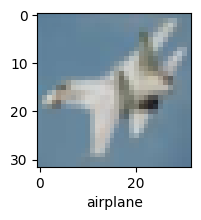

In [83]:
sample(x_test,y_test,10)

In [86]:
classes[y_pred_classes[10]]

'deer'

In [88]:
print('classification report: \n',classification_report(y_test,y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      1000
           1       0.87      0.76      0.81      1000
           2       0.58      0.58      0.58      1000
           3       0.47      0.53      0.50      1000
           4       0.68      0.59      0.63      1000
           5       0.63      0.55      0.59      1000
           6       0.77      0.77      0.77      1000
           7       0.75      0.74      0.75      1000
           8       0.67      0.88      0.76      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

